In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
binary_train = pd.read_csv('binary_train_70_backgroundTrainTestsplit.csv')
binary_test = pd.read_csv('binary_test_30_backgroundTrainTestsplit.csv')

# I. Splitting train_set and test_set into X_train, y_train, X_test, y_test

In [3]:
X_train = binary_train.drop(columns=['item_bought_next_28_days'])
y_train = binary_train['item_bought_next_28_days']

X_test = binary_test.drop(columns = ['item_bought_next_28_days'])
y_test = binary_test['item_bought_next_28_days']

In [4]:
X_train

,userID,itemID
0,1199,637
1,21557,3520
2,23387,1633
3,32069,29311
4,30359,11124
...,...,...
64238,40754,7997
64239,37518,18630
64240,27676,3997
64241,42405,28532


In [5]:
X_test

,userID,itemID
0,16831,32528
1,25813,12911
2,21519,16041
3,21214,6478
4,20386,19932
...,...,...
27529,2176,9773
27530,20041,19824
27531,39920,18714
27532,5127,1299


# II. Merging X_train, X_test with features

In [6]:
features = pd.read_csv('3_IU_FEAT_Average_Day.csv', index_col = 0).drop(columns=['first_date_bought', 'last_date_bought'])
features

,userID,itemID,average_cycle_days,first_day_delta_bought,last_day_delta_bought
0,0,1505,0.0,93,93
1,0,6446,0.0,194,194
2,0,9325,0.0,173,173
3,0,12468,0.0,64,64
4,0,12505,0.0,79,79
...,...,...,...,...,...
919701,46137,2667,0.0,109,109
919702,46137,20209,0.0,69,69
919703,46137,28343,0.0,69,69
919704,46137,28900,0.0,69,69


In [7]:
X_train_feat = X_train.merge(features, how = 'left', on = ['userID', 'itemID'])
X_test_feat = X_test.merge(features, how = 'left', on = ['userID', 'itemID'])
X_train_feat

,userID,itemID,average_cycle_days,first_day_delta_bought,last_day_delta_bought
0,1199,637,126.0,14,140
1,21557,3520,83.0,72,155
2,23387,1633,124.0,31,155
3,32069,29311,28.0,135,191
4,30359,11124,10.0,119,129
...,...,...,...,...,...
64238,40754,7997,31.0,52,114
64239,37518,18630,65.5,80,211
64240,27676,3997,127.0,77,204
64241,42405,28532,115.0,34,149


In [8]:
X_test_feat

,userID,itemID,average_cycle_days,first_day_delta_bought,last_day_delta_bought
0,16831,32528,64.00,129,193
1,25813,12911,94.00,47,141
2,21519,16041,26.00,108,134
3,21214,6478,84.00,16,100
4,20386,19932,34.00,26,94
...,...,...,...,...,...
27529,2176,9773,42.00,138,180
27530,20041,19824,53.33,25,185
27531,39920,18714,159.00,23,182
27532,5127,1299,47.50,118,213


# III. Training Models

## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_feat = sc.fit_transform(X_train_feat)
X_test_feat = sc.transform(X_test_feat)

## 1. Random Forest Classification Model

### Training the Random Forest Classification model on the Training set

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion ='entropy', random_state = 0)
classifier.fit(X_train_feat, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Predicting the test set result

In [11]:
y_pred = classifier.predict(X_test_feat)

### Making confusion matrix and evaluating model

In [12]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)
ac = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {ac}")

preci = precision_score(y_test, y_pred, average = None)
print(f"Precision score: {preci}")

recall = recall_score(y_test, y_pred, average = None)
print(f"Recall score: {recall}")

f1_sc = f1_score(y_test, y_pred, average = None)
print(f"f1 score: {f1_sc}")

Confusion matrix:
[[21769   850]
 [ 4222   693]]
Accuracy score: 0.8157913851964843
Precision score: [0.83755916 0.44912508]
Recall score: [0.96242097 0.14099695]
f1 score: [0.89565933 0.21461753]


## 2. Decision Tree Classification Model

### Training the Decision Tree Classification model on the Training set

In [13]:
from sklearn.tree import DecisionTreeClassifier
cl_tree = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
cl_tree.fit(X_train_feat, y_train)

DecisionTreeClassifier(random_state=0)

### Predicting the test set result

In [14]:
y_pred_tree = cl_tree.predict(X_test_feat)

### Making confusion matrix and evaluating model

In [15]:
cm_tree = confusion_matrix(y_test, y_pred_tree)
print('Confusion matrix:')
print(cm_tree)

ac_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy score: {ac_tree}")

preci_tree = precision_score(y_test, y_pred_tree, average = None)
print(f"Precision score: {preci_tree}")

recall_tree = recall_score(y_test, y_pred_tree, average = None)
print(f"Recall score: {recall_tree}")

f1_sc_tree = f1_score(y_test, y_pred_tree, average = None)
print(f"f1 score: {f1_sc_tree}")

Confusion matrix:
[[18989  3630]
 [ 3422  1493]]
Accuracy score: 0.7438802934553643
Precision score: [0.84730713 0.2914308 ]
Recall score: [0.83951545 0.30376399]
f1 score: [0.84339329 0.29746962]


# IV. Using Random Forest Classification Model trained to predict the result of submission file

In [16]:
submission_features = pd.read_csv('submission_features.csv', index_col=0)
submission_features

,userID,itemID,average_cycle_days,first_date_bought,last_date_bought,first_day_delta_bought,last_day_delta_bought
0,0,20664,94.5,2020-06-05,2020-12-11,5.0,194.0
1,0,28231,21.0,2020-11-20,2020-12-11,173.0,194.0
2,13,2690,67.0,2020-06-06,2020-12-24,6.0,207.0
3,15,1299,54.0,2020-09-09,2020-12-26,101.0,209.0
4,15,20968,39.5,2020-10-08,2020-12-26,130.0,209.0
...,...,...,...,...,...,...,...
9995,40242,11269,4.0,2021-01-08,2021-01-12,222.0,226.0
9996,40631,29657,17.0,2021-01-12,2021-01-29,226.0,243.0
9997,40911,12839,20.0,2021-01-10,2021-01-30,224.0,244.0
9998,41728,30443,25.0,2021-01-05,2021-01-30,219.0,244.0


In [17]:
sub_feat = submission_features.drop(columns=['first_date_bought', 'last_date_bought'])
sub_feat

,userID,itemID,average_cycle_days,first_day_delta_bought,last_day_delta_bought
0,0,20664,94.5,5.0,194.0
1,0,28231,21.0,173.0,194.0
2,13,2690,67.0,6.0,207.0
3,15,1299,54.0,101.0,209.0
4,15,20968,39.5,130.0,209.0
...,...,...,...,...,...
9995,40242,11269,4.0,222.0,226.0
9996,40631,29657,17.0,226.0,243.0
9997,40911,12839,20.0,224.0,244.0
9998,41728,30443,25.0,219.0,244.0


### 1. implementing feature scaling for sub_feat

In [18]:
sub_predict = sc.fit_transform(sub_feat)
sub_predict

array([[-1.72656307,  0.4400315 ,  0.75351332, -1.11398775,  0.66270466],
       [-1.72656307,  1.24058738, -1.1889477 ,  2.33129078,  0.66270466],
       [-1.7255899 , -1.46153998,  0.02674219, -1.09348013,  0.9870157 ],
       ...,
       [ 1.33603142, -0.38781966, -1.21537574,  3.3771789 ,  1.91005482],
       [ 1.39719198,  1.47460742, -1.08323553,  3.27464085,  1.91005482],
       [ 1.51247627,  0.55820527, -1.24180378,  3.27464085,  1.7603728 ]])

### 2. Using random forest classification model (classifier) to predict the result for sub_predict

In [19]:
y_sub_pred = classifier.predict(sub_predict)

### 3. Merging y_sub_pred to the submission_result dataframe

In [20]:
submission_result = sub_feat.copy()
submission_result['Model_Prediction'] = y_sub_pred

In [21]:
submission_result

,userID,itemID,average_cycle_days,first_day_delta_bought,last_day_delta_bought,Model_Prediction
0,0,20664,94.5,5.0,194.0,0.0
1,0,28231,21.0,173.0,194.0,0.0
2,13,2690,67.0,6.0,207.0,0.0
3,15,1299,54.0,101.0,209.0,0.0
4,15,20968,39.5,130.0,209.0,0.0
...,...,...,...,...,...,...
9995,40242,11269,4.0,222.0,226.0,0.0
9996,40631,29657,17.0,226.0,243.0,0.0
9997,40911,12839,20.0,224.0,244.0,0.0
9998,41728,30443,25.0,219.0,244.0,0.0


### 4. Calculating the rate of each classifiers (0, 1) in prediction

In [22]:
prediction_0 = len(submission_result[submission_result.Model_Prediction == 0.0])
prediction_1 = len(submission_result[submission_result.Model_Prediction == 1.0])
prediction_0

9461

In [23]:
prediction_1

539

# V. Using average_cycle_days and last_day_bought to predict the result of submission file

In [24]:
sub_feat

,userID,itemID,average_cycle_days,first_day_delta_bought,last_day_delta_bought
0,0,20664,94.5,5.0,194.0
1,0,28231,21.0,173.0,194.0
2,13,2690,67.0,6.0,207.0
3,15,1299,54.0,101.0,209.0
4,15,20968,39.5,130.0,209.0
...,...,...,...,...,...
9995,40242,11269,4.0,222.0,226.0
9996,40631,29657,17.0,226.0,243.0
9997,40911,12839,20.0,224.0,244.0
9998,41728,30443,25.0,219.0,244.0


### 1. calculating the predict_day_delta_bought: 
- predict_day_delta_bought = average_cycle_days + last_day_delta_bought

In [25]:
sub_feat_copy = sub_feat.copy()
# calculating column predict_day_delta_bought for all rows
sub_feat_copy['predict_day_delta_bought'] = sub_feat_copy.apply(lambda row: row['average_cycle_days'] + row['last_day_delta_bought'], axis=1)
sub_feat_copy

,userID,itemID,average_cycle_days,first_day_delta_bought,last_day_delta_bought,predict_day_delta_bought
0,0,20664,94.5,5.0,194.0,288.5
1,0,28231,21.0,173.0,194.0,215.0
2,13,2690,67.0,6.0,207.0,274.0
3,15,1299,54.0,101.0,209.0,263.0
4,15,20968,39.5,130.0,209.0,248.5
...,...,...,...,...,...,...
9995,40242,11269,4.0,222.0,226.0,230.0
9996,40631,29657,17.0,226.0,243.0,260.0
9997,40911,12839,20.0,224.0,244.0,264.0
9998,41728,30443,25.0,219.0,244.0,269.0


### 2. Predicting the result based on predict_day_delta_bought
- If predict_day_delta_bought >= 218 (from 04.01.2021) : classifier = 1.0
- else: classifier = 0.0

In [26]:
sub_feat_copy['statistic_prediction'] = sub_feat_copy.apply(lambda row: 1.0 if (row['predict_day_delta_bought'] >= 218 and row['predict_day_delta_bought'] <= 245) else 0.0, axis=1)
sub_feat_copy

,userID,itemID,average_cycle_days,first_day_delta_bought,last_day_delta_bought,predict_day_delta_bought,statistic_prediction
0,0,20664,94.5,5.0,194.0,288.5,0.0
1,0,28231,21.0,173.0,194.0,215.0,0.0
2,13,2690,67.0,6.0,207.0,274.0,0.0
3,15,1299,54.0,101.0,209.0,263.0,0.0
4,15,20968,39.5,130.0,209.0,248.5,0.0
...,...,...,...,...,...,...,...
9995,40242,11269,4.0,222.0,226.0,230.0,1.0
9996,40631,29657,17.0,226.0,243.0,260.0,0.0
9997,40911,12839,20.0,224.0,244.0,264.0,0.0
9998,41728,30443,25.0,219.0,244.0,269.0,0.0


# VI. Combining results of two different methods and analyzing the results

In [27]:
sub_feat_copy['model_prediction'] = submission_result.Model_Prediction
sub_feat_copy

,userID,itemID,average_cycle_days,first_day_delta_bought,last_day_delta_bought,predict_day_delta_bought,statistic_prediction,model_prediction
0,0,20664,94.5,5.0,194.0,288.5,0.0,0.0
1,0,28231,21.0,173.0,194.0,215.0,0.0,0.0
2,13,2690,67.0,6.0,207.0,274.0,0.0,0.0
3,15,1299,54.0,101.0,209.0,263.0,0.0,0.0
4,15,20968,39.5,130.0,209.0,248.5,0.0,0.0
...,...,...,...,...,...,...,...,...
9995,40242,11269,4.0,222.0,226.0,230.0,1.0,0.0
9996,40631,29657,17.0,226.0,243.0,260.0,0.0,0.0
9997,40911,12839,20.0,224.0,244.0,264.0,0.0,0.0
9998,41728,30443,25.0,219.0,244.0,269.0,0.0,0.0


In [28]:
model_predict_0 = len(sub_feat_copy[sub_feat_copy.model_prediction == 0.0])
model_predict_1 = len(sub_feat_copy[sub_feat_copy.model_prediction == 1.0])

statistic_predict_0 = len(sub_feat_copy[sub_feat_copy.statistic_prediction == 0.0])
statistic_predict_1 = len(sub_feat_copy[sub_feat_copy.statistic_prediction == 1.0])


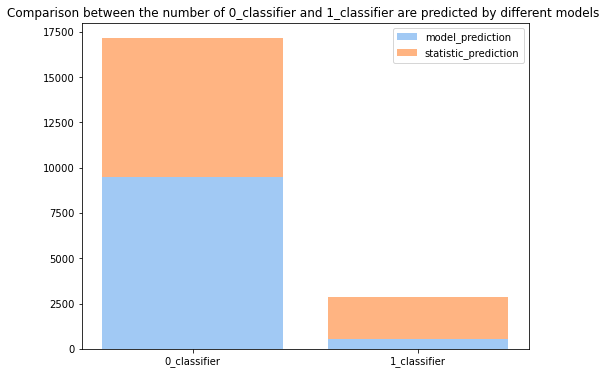

In [29]:
sns.set_palette('pastel')
plt.figure(figsize = (8, 6))
#ax = plt.subplot()
#ax.set_xticks([0, 1])
x = [0, 1]
model_predict = [model_predict_0, model_predict_1]
statistic_predict = [statistic_predict_0, statistic_predict_1]
plt.bar(x, model_predict)

plt.bar(x, statistic_predict, bottom = model_predict)

plt.xticks(x, ['0_classifier', '1_classifier'])
plt.legend(['model_prediction', 'statistic_prediction'])
plt.title('Comparison between the number of 0_classifier and 1_classifier are predicted by different models ')

plt.show()

- There are a huge difference between results which are predicted by random forest model and by using statistic method. 
- So we need to check again our model